# Mexico ZipCode - Container Polygon

In [1]:
from IPython.core.display import display, HTML
display(HTML("""<style>.container {width:95% !important} pre{font-size: 10px;}</style>"""))

In [2]:
from pyspark.sql.functions import expr
from rpolygonpoint.containerpolygon import ContainerPolygon
from rpolygonpoint.utils.spark import spark
from rpolygonpoint.utils.plot import plot_polygon, add_polygon, add_point
from rpolygonpoint.utils.plot import polygon_to_list, point_to_list

In [3]:
# Path to data and workspace
path_ws = "C:/D/engines/rpolygonpoint/rpolygonpoint/data/"

In [4]:
# Load data to Mexico polygon
df_mexico_polygon = spark.read.parquet(path_ws + "t_country_polygon")\
    .filter("country_id = 'MX'")\
    .selectExpr(
        "polygon_id",
        "point_seq",
        "longitude_id as coord_x",
        "latitude_id as coord_y"
    ).filter("point_seq != 3382")

df_mexico_polygon.show(5)

+----------+---------+-----------+----------------+
|polygon_id|point_seq|    coord_x|         coord_y|
+----------+---------+-----------+----------------+
|         1|      1.0|-114.742783|       18.322777|
|         1|      2.0|-114.789726|18.3180540000001|
|         1|      3.0|-114.796402|18.3188860000001|
|         1|      4.0|-114.800568|18.3216629999999|
|         1|      5.0|-114.802513|18.3266640000001|
+----------+---------+-----------+----------------+
only showing top 5 rows



In [5]:
# Load data to Mexico Zipcode
df_mexico_zipcode2 = spark.read.parquet(path_ws + "t_world_zipcode")\
    .filter("country_id = 'MX'")\
    .drop("country_name", "country_id")

df_mexico_zipcode2.show(5)

# There is more than one coordinate per zipcode
df_mexico_zipcode = df_mexico_zipcode2\
    .groupBy(
        "zipcode_id"
    ).agg(
        expr("mean(longitude_id) as coord_x"),
        expr("mean(latitude_id) as coord_y")
    ).distinct()

df_mexico_zipcode.show(5)

+--------+--------------+-------+--------------+--------------------+----------+------------+-----------+
|state_id|    state_name|city_id|     city_name|           town_name|zipcode_id|longitude_id|latitude_id|
+--------+--------------+-------+--------------+--------------------+----------+------------+-----------+
|      01|AGUASCALIENTES|    001|AGUASCALIENTES|         AGRICULTURA|     20234|   -102.1885|    21.8767|
|      01|AGUASCALIENTES|    001|AGUASCALIENTES|        AGROPECUARIO|     20135|   -102.2957|    21.8115|
|      01|AGUASCALIENTES|    001|AGUASCALIENTES|          AGUA CLARA|     20263|   -102.2848|    21.8669|
|      01|AGUASCALIENTES|    001|AGUASCALIENTES|AGUASCALIENTES (L...|     20349|   -102.3288|    21.7578|
|      01|AGUASCALIENTES|    001|AGUASCALIENTES| AGUASCALIENTES 2000|     20117|   -102.3247|    21.8484|
+--------+--------------+-------+--------------+--------------------+----------+------------+-----------+
only showing top 5 rows

+----------+---------

In [6]:
# Generated Mexico polygon mesh

mexico_polygon_container = ContainerPolygon(df_mexico_polygon)

mexico_polygon_container.set_mesh_split(2) # Split mesh cells
mexico_polygon_container.set_mesh_level(7) # Iterations number to split mesh cells
mexico_polygon_container.set_earned_prop(0.1) # earned rate to continue split
mexico_polygon_container.set_path_data(path_ws + "mx_zipcode_polygoncontainer/")

mexico_polygon_container.get_polygon_mesh()
# mexico_polygon_container.load_polygon_mesh() # Load preprocesor to polygon container

[2022-01-01 21:37:13.514554] - [INFO] - [write_persist] :: Write DataFrame to C:/D/engines/rpolygonpoint/rpolygonpoint/data/mx_zipcode_polygoncontainer/t_rpp_delimiter_rectangle: WriteMode overwrite!
[2022-01-01 21:37:18.202562] - [INFO] - [write_persist] :: Persist DataFrame EndPolygonPoint with 4,168 rows: StorageLevel Disk Serialized 1x Replicated!
[2022-01-01 21:37:18.203546] - [INFO] - [get_polygon_side] :: side end point
[2022-01-01 21:37:22.218651] - [INFO] - [write_persist] :: Write DataFrame to C:/D/engines/rpolygonpoint/rpolygonpoint/data/mx_zipcode_polygoncontainer/t_rpp_polygon_side: WriteMode overwrite!
[2022-01-01 21:37:22.301213] - [INFO] - [unpersist] :: Unpersist DataFrame EndPolygonPoint!
[2022-01-01 21:37:22.301213] - [INFO] - [get_polygon_side] :: polygon sides
[2022-01-01 21:37:24.747665] - [INFO] - [write_persist] :: Persist DataFrame PolygonMesh with 560 rows: StorageLevel Disk Serialized 1x Replicated!
[2022-01-01 21:37:24.747665] - [INFO] - [get_polygon_mesh2] 

[2022-01-01 21:38:24.356246] - [INFO] - [write_persist] :: Write DataFrame to C:/D/engines/rpolygonpoint/rpolygonpoint/data/mx_zipcode_polygoncontainer/t_rpp_polygon_mesh: WriteMode overwrite!
[2022-01-01 21:38:24.359658] - [INFO] - [unpersist] :: Unpersist DataFrame !
[2022-01-01 21:38:24.950276] - [INFO] - [unpersist] :: Unpersist DataFrame !
[2022-01-01 21:38:25.461388] - [INFO] - [unpersist] :: Unpersist DataFrame !
[2022-01-01 21:38:27.199956] - [INFO] - [unpersist] :: Unpersist DataFrame !
[2022-01-01 21:38:29.487153] - [INFO] - [unpersist] :: Unpersist DataFrame !
[2022-01-01 21:38:29.487153] - [INFO] - [get_polygon_mesh] :: Level 4 of 7
[2022-01-01 21:38:30.248546] - [INFO] - [write_persist] :: Persist DataFrame PolygonDelimietRectangle with 363 rows: StorageLevel Disk Serialized 1x Replicated!
[2022-01-01 21:38:31.266245] - [INFO] - [write_persist] :: Persist DataFrame ContinueSplitPolygonMesh-Level 3 with 33 rows: StorageLevel Disk Serialized 1x Replicated!
[2022-01-01 21:38:

[2022-01-01 21:39:41.979833] - [INFO] - [write_persist] :: Persist DataFrame PolygonDelimietRectangle with 2,936 rows: StorageLevel Disk Serialized 1x Replicated!
[2022-01-01 21:39:41.979833] - [INFO] - [get_cell_type] :: delimiter rectangle out
[2022-01-01 21:39:42.715919] - [INFO] - [write_persist] :: Persist DataFrame ContainerRectangle with 126 rows: StorageLevel Disk Serialized 1x Replicated!
[2022-01-01 21:39:42.715919] - [INFO] - [get_container_rectangle] :: container rectangle
[2022-01-01 21:39:42.715919] - [INFO] - [get_cell_type] :: container rectangle out
[2022-01-01 21:39:45.867906] - [INFO] - [write_persist] :: Persist DataFrame PolygonMeshCellType with 40,304 rows: StorageLevel Disk Serialized 1x Replicated!
[2022-01-01 21:39:45.876919] - [INFO] - [unpersist] :: Unpersist DataFrame ContainerPolygon!
[2022-01-01 21:39:45.882002] - [INFO] - [unpersist] :: Unpersist DataFrame DelimiterRectangleOutside!
[2022-01-01 21:39:45.883000] - [INFO] - [unpersist] :: Unpersist DataFram

In [7]:
# Validate location of zipcode
df_mexico_zipcode_val = mexico_polygon_container\
    .get_container_polygon(
        df_point=df_mexico_zipcode, 
        point_id="zipcode_id"
    )

[2022-01-01 21:40:44.210323] - [INFO] - [write_persist] :: Persist DataFrame ContainerRectangle with 32,493 rows: StorageLevel Disk Serialized 1x Replicated!
[2022-01-01 21:40:44.210323] - [INFO] - [get_container_rectangle] :: container rectangle
[2022-01-01 21:40:45.717231] - [INFO] - [write_persist] :: Persist DataFrame PolygonDelimietRectangle with 18,153 rows: StorageLevel Disk Serialized 1x Replicated!
[2022-01-01 21:40:47.912521] - [INFO] - [write_persist] :: Persist DataFrame ContainerRectangle with 32,461 rows: StorageLevel Disk Serialized 1x Replicated!
[2022-01-01 21:40:47.912521] - [INFO] - [get_container_rectangle] :: container rectangle
[2022-01-01 21:40:49.234251] - [INFO] - [write_persist] :: Persist DataFrame ContainerPolygon with 2,283 rows: StorageLevel Disk Serialized 1x Replicated!
[2022-01-01 21:40:49.234251] - [INFO] - [get_container_polygon] :: container polygon
[2022-01-01 21:40:50.869536] - [INFO] - [write_persist] :: Persist DataFrame ContainerPolygon with 34,

In [8]:
lst_mexico_polygon = polygon_to_list(df_mexico_polygon)
lst_mexico_mesh = polygon_to_list(mexico_polygon_container.df_polygon_mesh, polygon_id=["polygon_id", "cell_id"])
lst_mexixo_zipcode_val = point_to_list(df_mexico_zipcode_val)
lst_mexixo_zipcode_not = point_to_list(df_mexico_zipcode.join(df_mexico_zipcode_val, "zipcode_id", "left_anti"))

(<AxesSubplot:title={'center':'Validation Mexico ZipCode'}, xlabel='coord x', ylabel='coord y'>,
 <Figure size 7200x7200 with 1 Axes>)

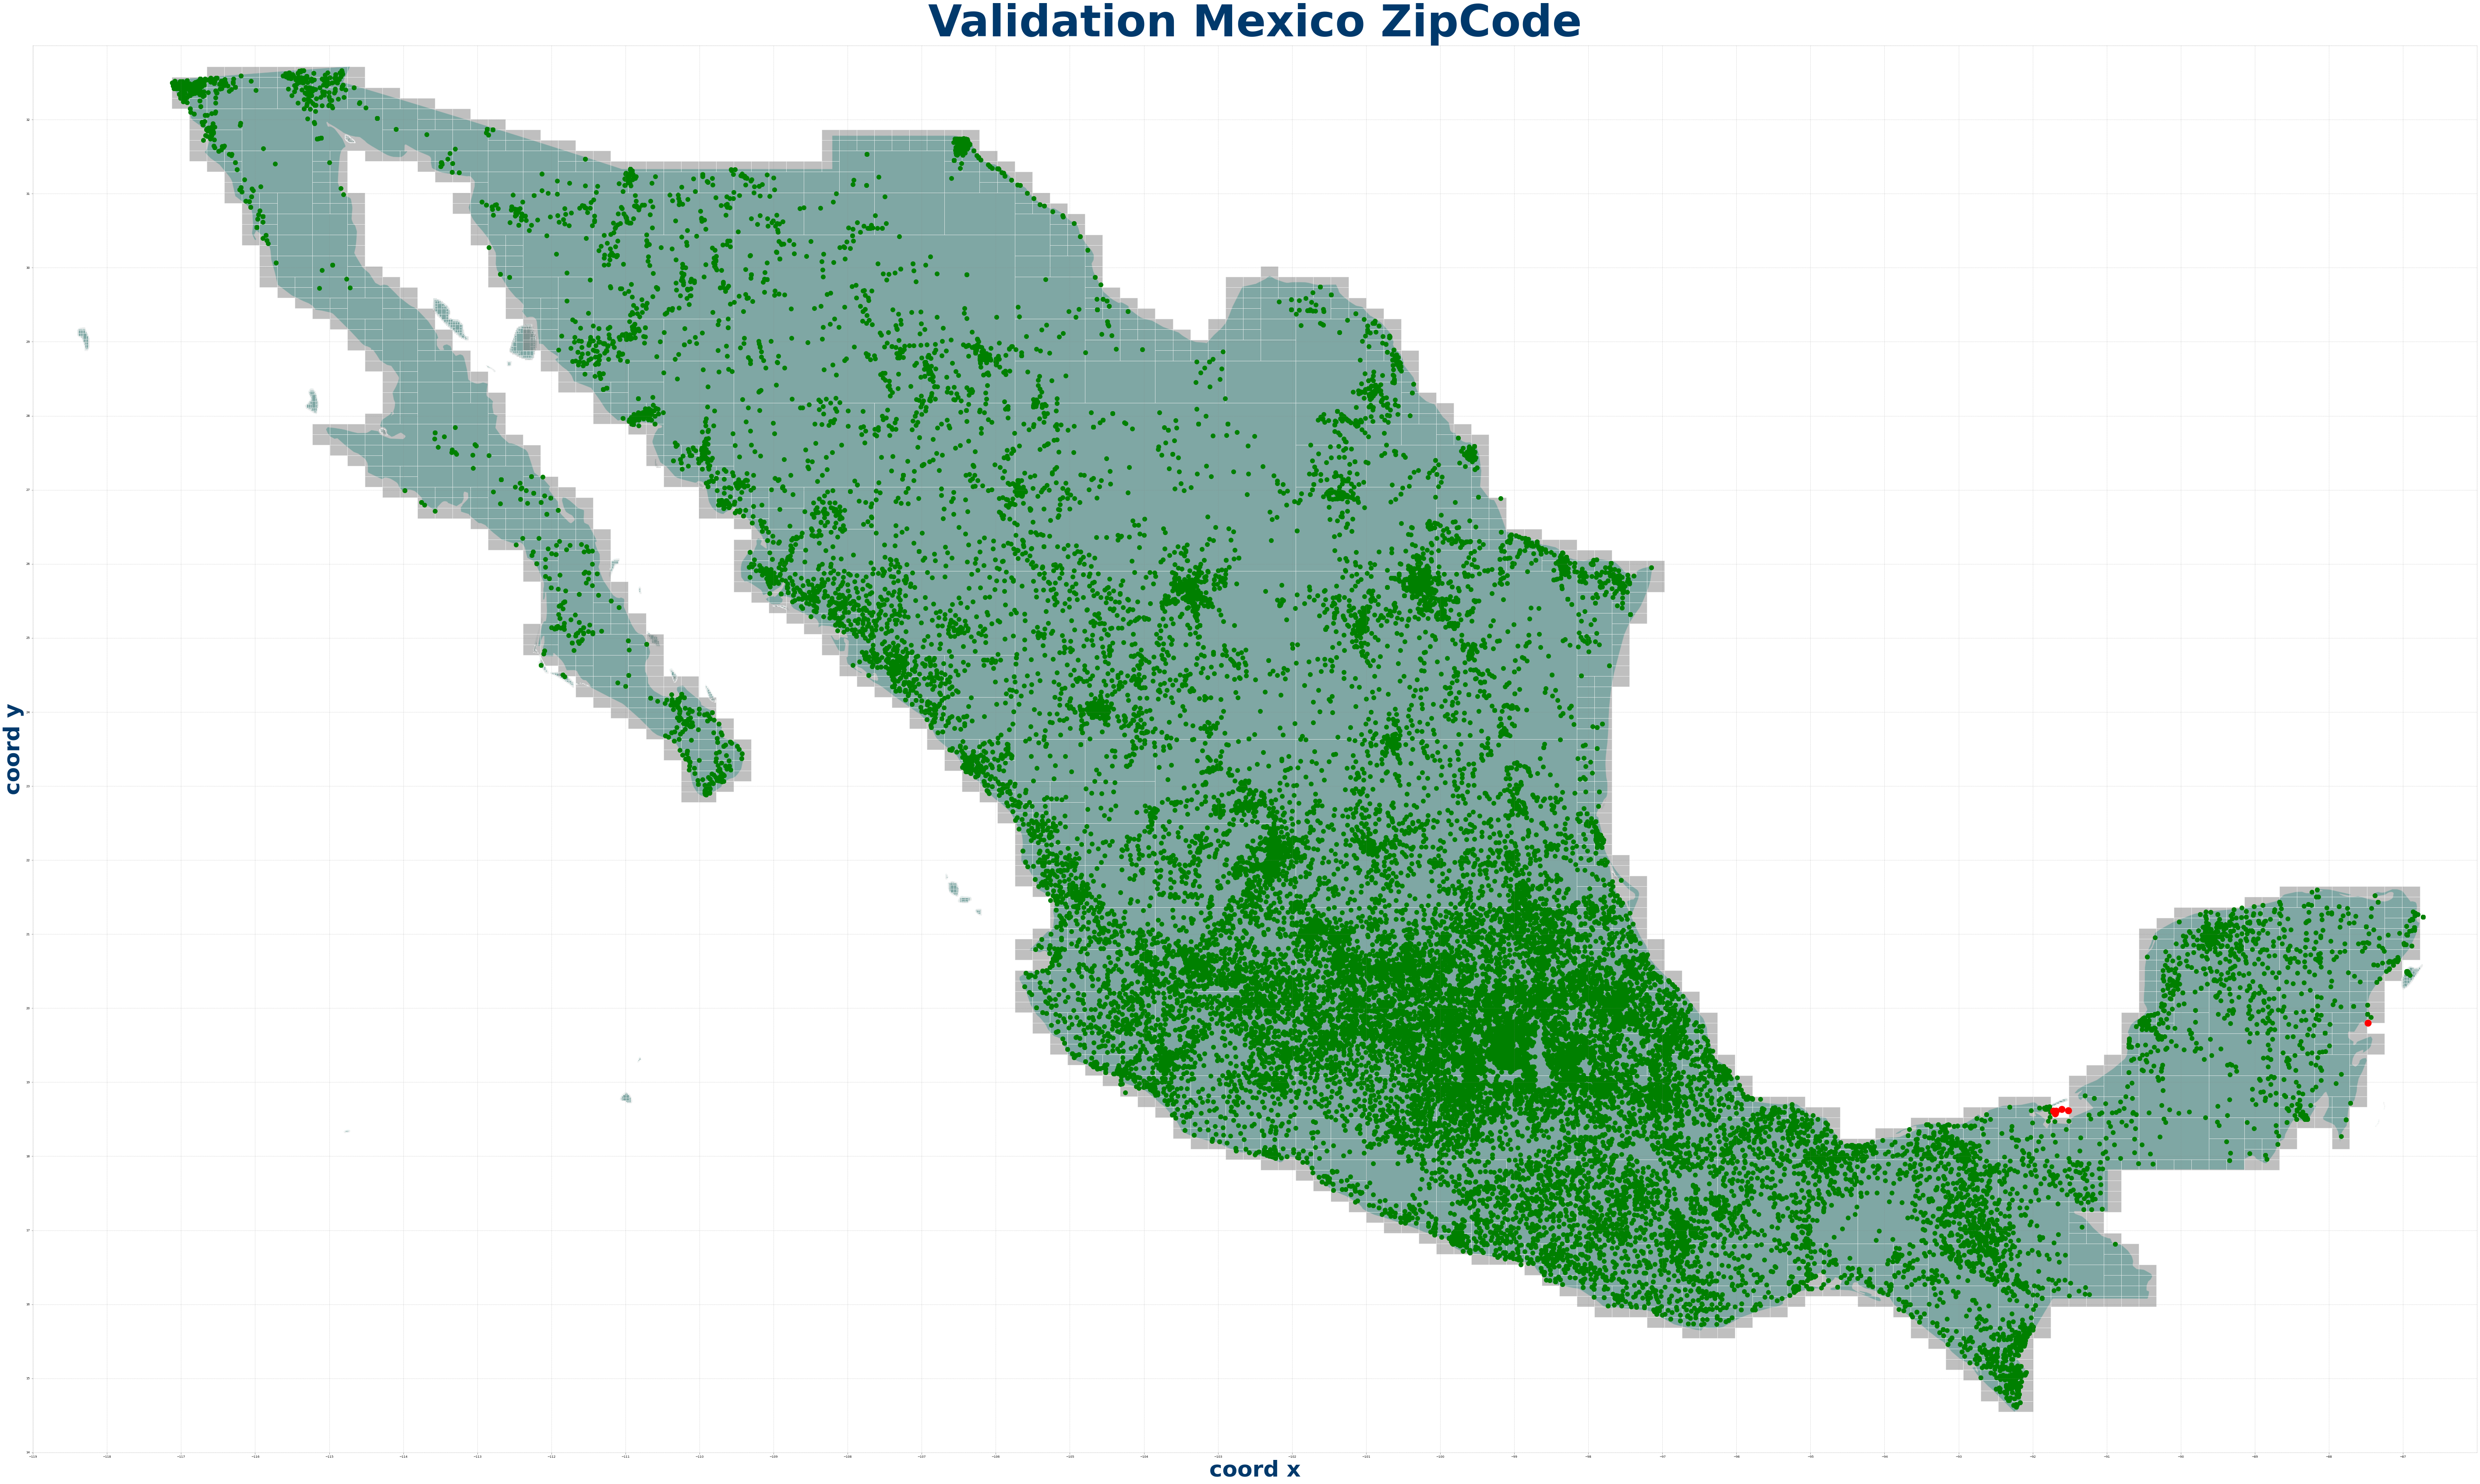

In [9]:
# Generated plot of validation of Mexico zipcode
# Green color is ok
# Red color is not ok

fig = plot_polygon(lst_mexico_polygon, tick=1, title="Validation Mexico ZipCode",  figsize=(100, 100), alpha=0.5, fontsize=5)
add_polygon(fig, lst_mexico_mesh, color="gray", alpha=0.5)
add_point(fig, lst_mexixo_zipcode_val, color="green", size=5)
add_point(fig, lst_mexixo_zipcode_not, color="red", size=10)

In [10]:
spark.catalog.clearCache()